<a href="https://colab.research.google.com/github/sallalhaider18/Linear-Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/Ecommerce Customers')
df.head(n=5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [11]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


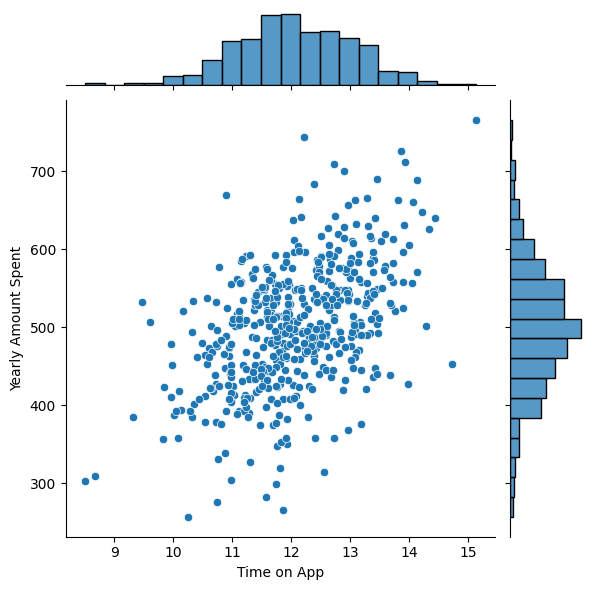

In [14]:
sns.jointplot(x ='Time on App', y = 'Yearly Amount Spent', data = df)

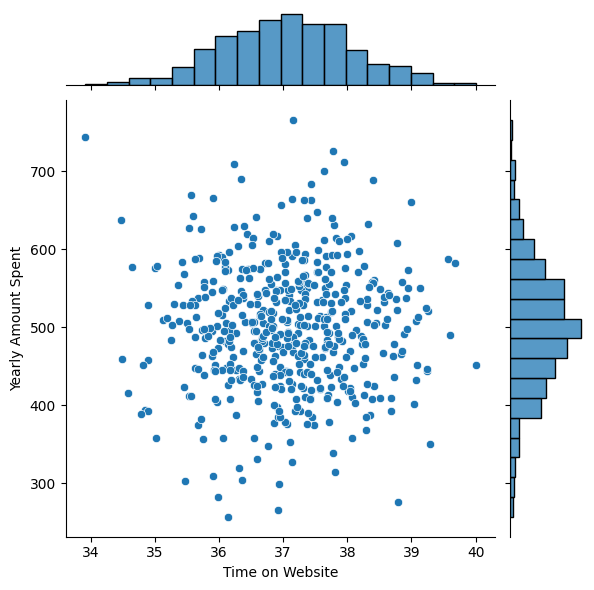

In [15]:
sns.jointplot(x ='Time on Website', y = 'Yearly Amount Spent', data = df)

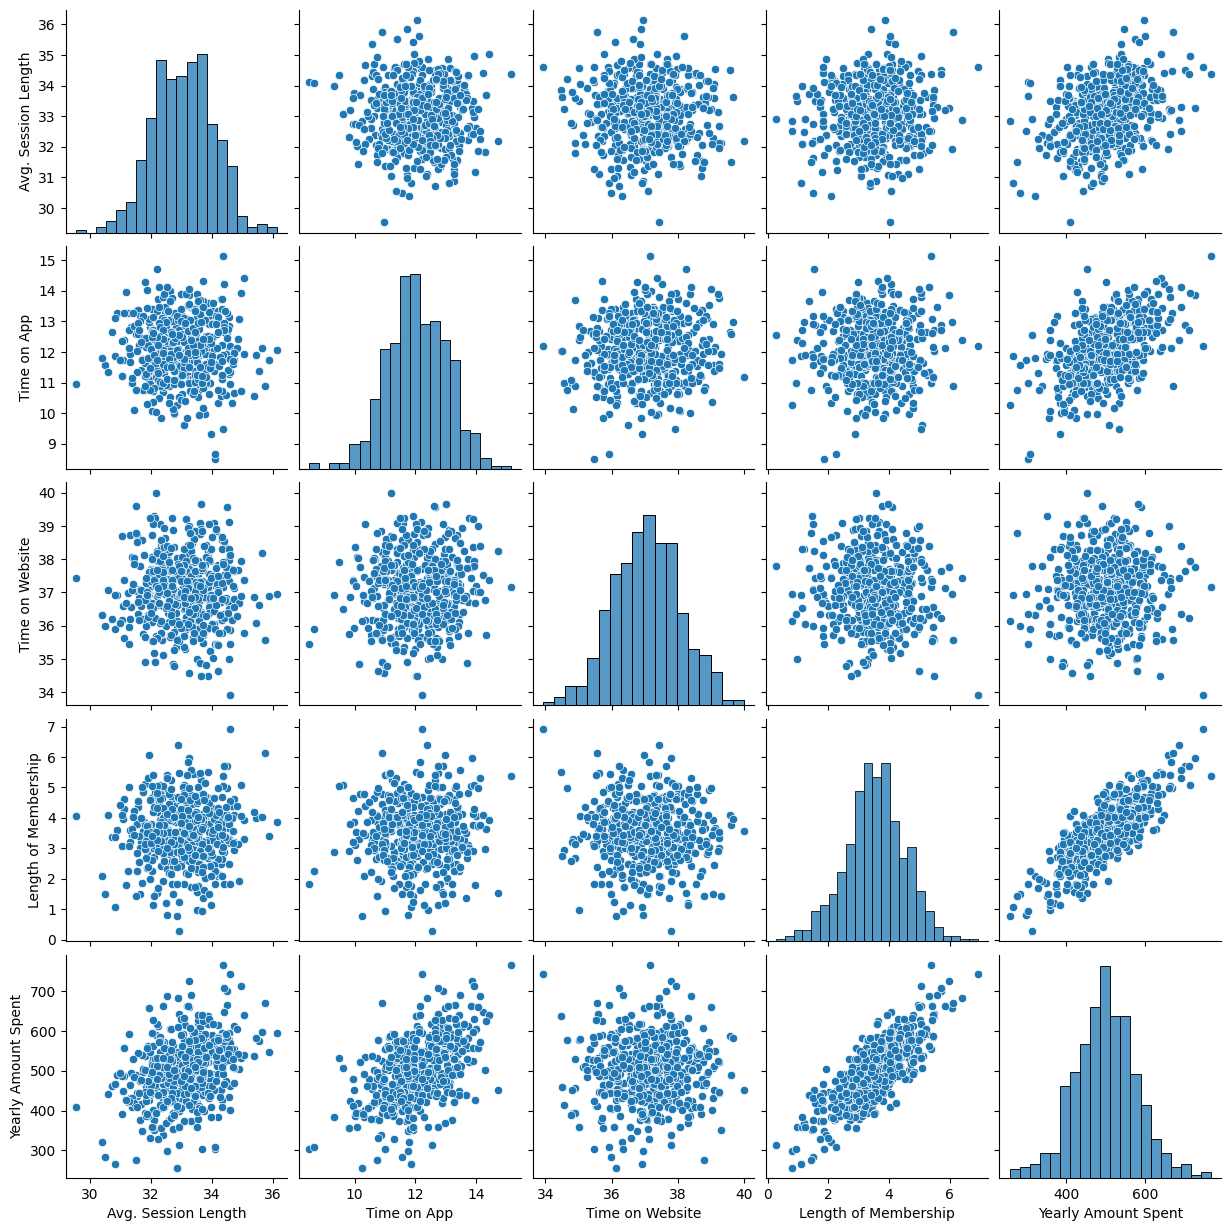

In [17]:
sns.pairplot(df, kind='scatter')

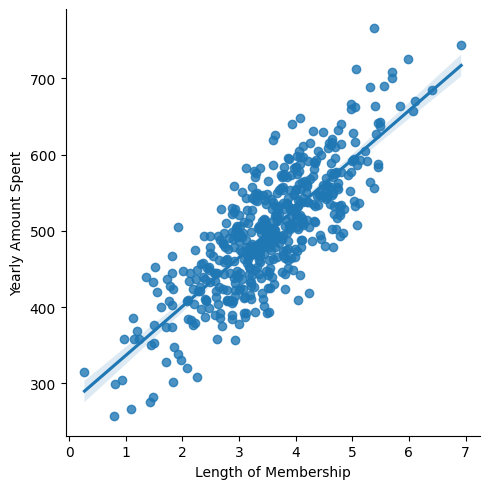

In [19]:
sns.lmplot(data = df, x = 'Length of Membership', y = 'Yearly Amount Spent')

In [23]:
from sklearn.model_selection import train_test_split

# Select features (X) correctly using a list
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

# Target (y)
y = df['Yearly Amount Spent']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.linear_model import LinearRegression
# Initialize linear regression model
lm = LinearRegression()

# Train the model
lm.fit(X_train, y_train)


LinearRegression()

In [26]:
# Predict on the test set
y_pred = lm.predict(X_test)


Feature coefficients:
                Feature  Coefficient
3  Length of Membership    61.896829
1           Time on App    38.785346
0   Avg. Session Length    25.596259
2       Time on Website     0.310386


/tmp/ipython-input-2616719235.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


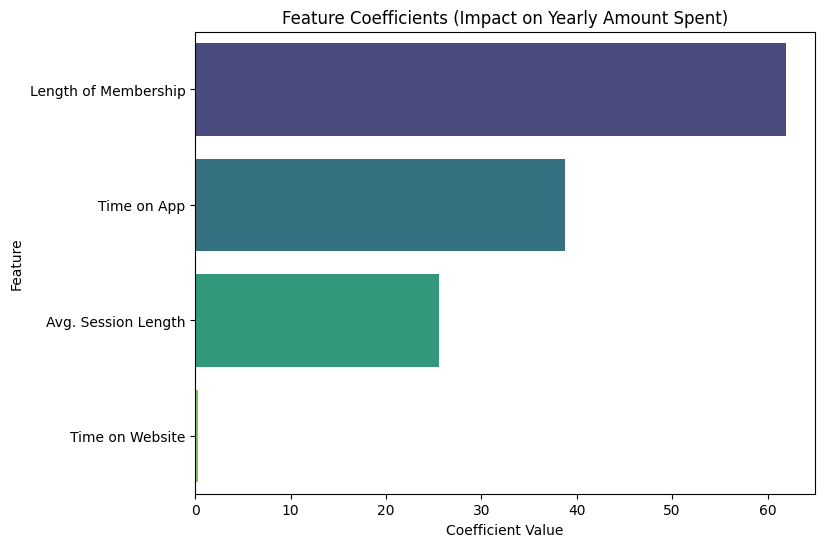

In [27]:
# Create a dataframe of feature names and their coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lm.coef_
})

# Sort by absolute value to see the most important features first
coefficients['abs_coef'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='abs_coef', ascending=False).drop('abs_coef', axis=1)

print("Feature coefficients:")
print(coefficients)

# Optional: Visualize coefficients
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Coefficients (Impact on Yearly Amount Spent)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate errors
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print results
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)


MSE: 109.8637411839399
RMSE: 10.48159058463647
MAE: 8.558441885315231
